# SBI Life Insurance Claim

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\Ash\Desktop\Data Trained\Projects\Project 5-6/SBI_Life_insurance.csv")

In [3]:
# print the top five rows of the dataset

data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
#check the info of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.7 KB


In [5]:
#checking the missing values

data.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

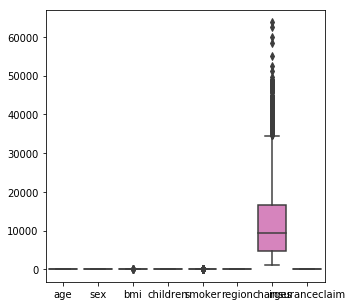

In [6]:
#check the outliers

plt.figure(figsize=(5,5))
sns.boxplot(data=data)

#### Since the box plot shows there are many outliers in the feature charges, therefore we need to treat them

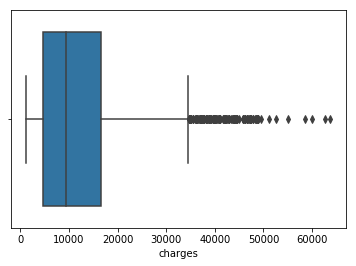

In [7]:
sns.boxplot(x='charges',data=data)

In [8]:
# Treatment of outliers

Q1=data.charges.quantile(0.25)
Q3=data.charges.quantile(0.75)

IQR = Q3-Q1
#IQR
outlier_min = Q1 - 1.5*IQR
outlier_max = Q3 + 1.5*IQR

In [9]:
# Remove the outliers from the dataset
new_data=data[~((data< outlier_min) | (data> outlier_max)).any(axis=1)]
new_data

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
5,31,0,25.740,0,0,2,3756.62160,0
6,46,0,33.440,1,0,2,8240.58960,1
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0
9,60,0,25.840,0,0,1,28923.13692,0


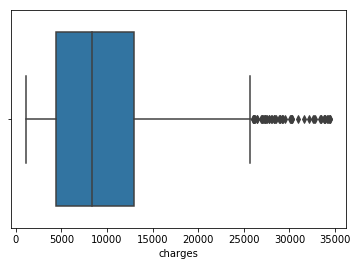

In [10]:
sns.boxplot(x='charges',data=new_data)

In [11]:
# we reduced the size of the data by outlier treatment

print('We reduced the data size by: %d' % (len(data) - len(new_data)))

We reduced the data size by: 139


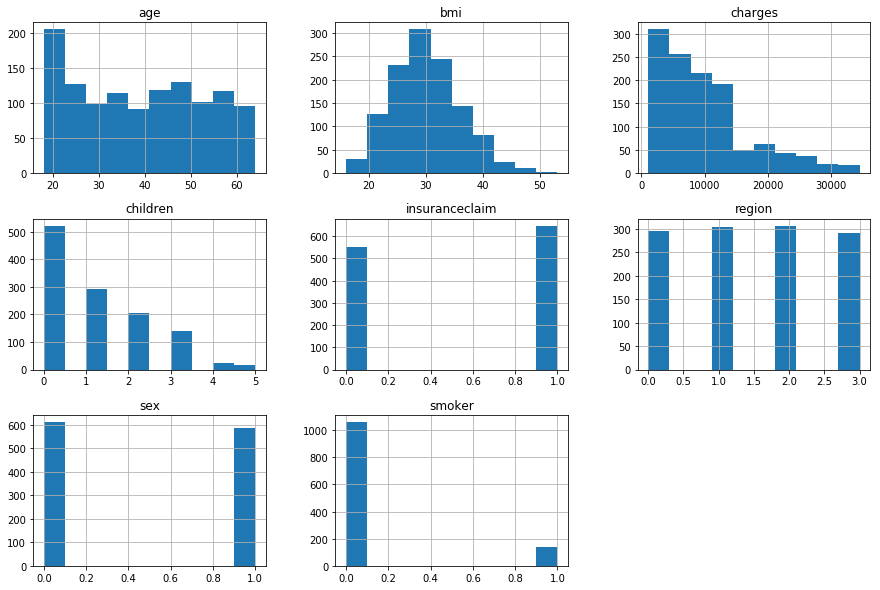

In [12]:
new_data.hist(figsize=(15,10))
plt.show()

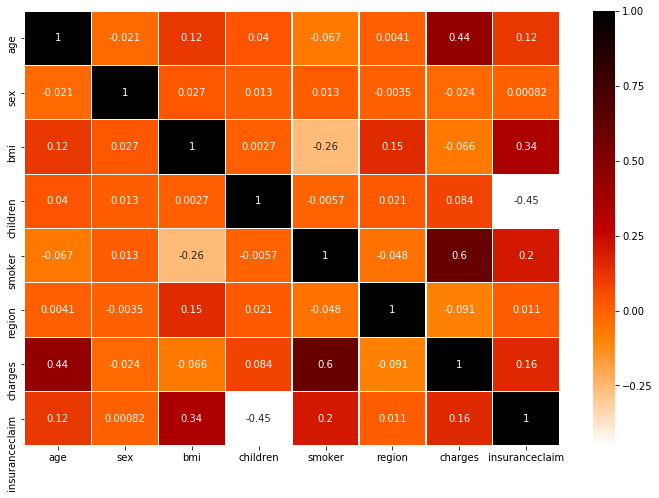

In [13]:
# check the correlation between the target and the features

plt.figure(figsize=(12,8))
sns.heatmap(new_data.corr(),cmap='gist_heat_r',linewidths=0.1,annot=True)

In [14]:
# Bivariate analysis

pd.crosstab(new_data['insuranceclaim'],new_data['smoker'])

smoker,0,1
insuranceclaim,,
0,527,25
1,534,113


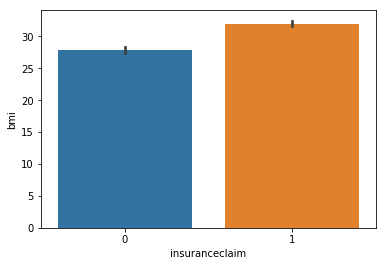

In [15]:
sns.barplot(x='insuranceclaim',y='bmi',data=new_data)

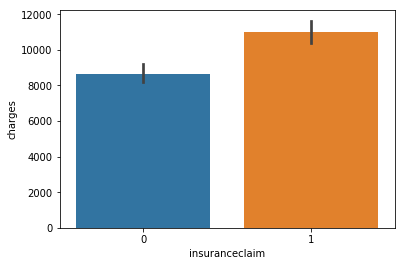

In [16]:
sns.barplot(x='insuranceclaim',y='charges',data=new_data)

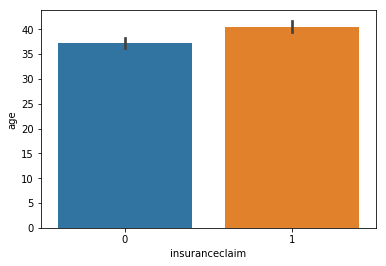

In [17]:
sns.barplot(x='insuranceclaim',y='age',data=new_data)

In [18]:
# segregate the independent and dependent variable

X = new_data.iloc[:,:-1]
y = new_data.iloc[:,-1]

In [19]:
# scaling the features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled,columns=X.columns)
X

,age,sex,bmi,children,smoker,region,charges
0,-1.421544,-0.979362,-0.365377,-0.893260,2.772797,1.357878,0.961182
1,-1.492656,1.021073,0.611647,-0.069399,-0.360647,0.455886,-1.133192
2,-0.781529,1.021073,0.483485,1.578322,-0.360647,0.455886,-0.756865
3,-0.425965,1.021073,-1.230051,-0.893260,-0.360647,-0.446106,1.665721
4,-0.497078,1.021073,-0.202262,-0.893260,-0.360647,-0.446106,-0.837356
5,-0.568190,-0.979362,-0.724895,-0.893260,-0.360647,0.455886,-0.852586
6,0.498501,-0.979362,0.556720,-0.069399,-0.360647,0.455886,-0.233094
7,-0.141514,-0.979362,-0.392008,1.578322,-0.360647,-0.446106,-0.365598
8,-0.141514,1.021073,-0.044141,0.754461,-0.360647,-1.348099,-0.486498
9,1.494080,-0.979362,-0.708250,-0.893260,-0.360647,-0.446106,2.624347


In [20]:
# Segregate the train and test split

from sklearn.model_selection import train_test_split, KFold, cross_val_score

train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.33,random_state=42,stratify=y)

## Implementing all the models

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [22]:
results = []
names = []
models = []

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier(n_neighbors=11)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC', RandomForestClassifier()))

# evaluate each model in turn
for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, train_X, train_y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
    print(msg)

LR: 85.802469 (0.027355)
KNN: 85.058642 (0.020621)
DT: 97.635802 (0.024594)
NB: 77.572531 (0.040600)
SVM: 87.050926 (0.029515)
RFC: 91.274691 (0.035499)


In [23]:
#Since Decission Tree classifier is the best fitted model

dt = DecisionTreeClassifier(random_state=5)
dt.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=5,
            splitter='best')

In [24]:
dt_predicted = dt.predict(test_X)
dt_predicted

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,

In [25]:
#checking the accuracy of the model on the test data

dt_score = accuracy_score(test_y,dt_predicted)
print('Accuracy of the model : %.2f' % (dt_score*100))

print('Classifiction report :')
print(classification_report(test_y,dt_predicted))

print('confusion matrix :')
print(confusion_matrix(test_y,dt_predicted))

Accuracy of the model : 97.73
Classifiction report :
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       182
           1       0.99      0.97      0.98       214

   micro avg       0.98      0.98      0.98       396
   macro avg       0.98      0.98      0.98       396
weighted avg       0.98      0.98      0.98       396

confusion matrix :
[[180   2]
 [  7 207]]


AUC: 0.98


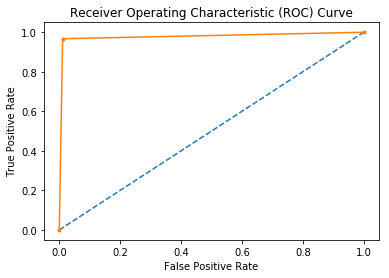

In [26]:
# calculate AUC
auc = roc_auc_score(test_y, dt_predicted)
print('AUC: %.2f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(test_y, dt_predicted)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

